Question 1

<ipython-input-97-098444f8f0ac>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Slope is {float(slope):.2f}')
<ipython-input-97-098444f8f0ac>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Intercept is {float(intercept):.2f}')


Slope is 32675.98
Intercept is -18379.89
Mean squared error for custom model is 3201134023.77
Mean squared error for builtin model is: 2681026163.51


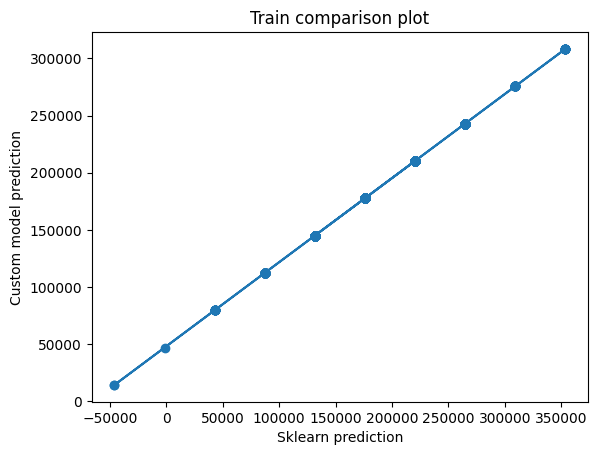

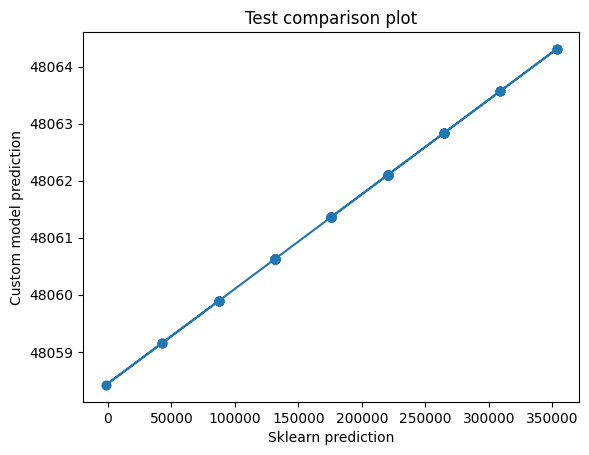

In [97]:
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
df=pd.read_csv("train.csv")
X = df[['OverallQual']].values
Y=df[['SalePrice']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_mean=np.mean(X)
Y_mean=np.mean(Y)
n=len(Y)
#custom model
def linear_regression_fit(X,Y):
  upward=0
  downward=0
  for i in range(n):
     upward=upward+(X[i]-X_mean)*(Y[i]-Y_mean)
     downward=downward+(X[i]-X_mean)**2
     b1=upward/downward
     b0=Y_mean-(b1*X_mean)
     return b1,b0
def linear_regression_predict(b0,b1,X):
    Y_pred=b0+(b1*X)
    return Y_pred

slope,intercept=linear_regression_fit(X_train,Y_train)
print(f'Slope is {float(slope):.2f}')
print(f'Intercept is {float(intercept):.2f}')
Y_pred1=linear_regression_predict(intercept,slope,X_test)
#MSE
mse=mean_squared_error(Y_test,Y_pred1)
print(f'Mean squared error for custom model is {mse:.2f}')


#builtin functions

# Reshape X for sklearn
X_train_2d = X_train.reshape(-1, 1)
X_test_2d = X_test.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train_2d, Y_train)

# Predict on test
Y_pred2= model.predict(X_test_2d)

# MSE
mse_sklearn = mean_squared_error(Y_test, Y_pred2)
print(f"Mean squared error for builtin model is: {mse_sklearn:.2f}")


#Plotting
import matplotlib.pyplot as plt
#Train comparison plot
X=model.predict(X_train_2d)
Y=linear_regression_predict(intercept,slope,X_train)
slope, intercept, r, p, std_err = stats.linregress(X.flatten(), Y.flatten())
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, X.flatten()))
plt.scatter(X,Y)
plt.plot(X,mymodel)
plt.title('Train comparison plot')
plt.xlabel('Sklearn prediction')
plt.ylabel('Custom model prediction')
plt.show()

#Test comparison plot
X=model.predict(X_test_2d)
Y=linear_regression_predict(intercept,slope,X_test)
slope, intercept, r, p, std_err = stats.linregress(X.flatten(), Y.flatten())
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, X.flatten()))
plt.scatter(X,Y)
plt.plot(X,mymodel)
plt.title('Test comparison plot')
plt.xlabel('Sklearn prediction')
plt.ylabel('Custom model prediction')
plt.show()




Question 2

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

df['PassedMath'] =df['math score'].apply(lambda x: 1 if x >= 50 else 0)

# Use reading score as the only feature
X = df['reading score'].values
y = df['PassedMath'].values

# Split into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, lr=0.01, iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X.reshape(-1, 1)]
    theta = np.zeros(X_b.shape[1])

    for _ in range(iterations):
        z = np.dot(X_b, theta)
        predictions = sigmoid(z)
        error = predictions - y
        gradient = (1 / m) * np.dot(X_b.T, error)
        theta -= lr * gradient

    return theta

theta = train_logistic_regression(X_train, y_train)
print("Trained coefficients:", theta)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def predict_proba(X, theta):
    X_b = np.c_[np.ones((len(X), 1)), X.reshape(-1, 1)]
    return sigmoid(np.dot(X_b, theta))

def predict_class(X, theta, threshold=0.5):
    return (predict_proba(X, theta) >= threshold).astype(int)

# Predict on test data
y_pred_custom = predict_class(X_test, theta)

print("Custom Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Confusion Matrix (Custom Model):\n", confusion_matrix(y_test, y_pred_custom))


#Sklearn model
from sklearn.linear_model import LogisticRegression

X_train_2d = X_train.reshape(-1, 1)
X_test_2d = X_test.reshape(-1, 1)

clf = LogisticRegression()
clf.fit(X_train_2d, y_train)

y_pred_sklearn = clf.predict(X_test_2d)


print("Sklearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Confusion Matrix (Sklearn):\n", confusion_matrix(y_test, y_pred_sklearn))

def print_metrics(y_true, y_pred, name):
    print(f"\n🔍 Evaluation for {name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

print_metrics(y_test, y_pred_custom, "Custom Logistic Regression")
print_metrics(y_test, y_pred_sklearn, "Sklearn Logistic Regression")


Trained coefficients: [-0.32582411  0.02149939]
Custom Logistic Regression Accuracy: 0.83
Confusion Matrix (Custom Model):
 [[  0  34]
 [  0 166]]
Sklearn Logistic Regression Accuracy: 0.865
Confusion Matrix (Sklearn):
 [[ 14  20]
 [  7 159]]

🔍 Evaluation for Custom Logistic Regression
Accuracy : 0.83
Precision: 0.83
Recall   : 1.0
F1 Score : 0.907103825136612

🔍 Evaluation for Sklearn Logistic Regression
Accuracy : 0.865
Precision: 0.888268156424581
Recall   : 0.9578313253012049
F1 Score : 0.9217391304347826
